## Convolution Neural Networks: Application

Welcome to the Course 4's second assignment! In this notebook, you will:
* Create a mood classifier using the TF Keras Sequential API
* Build a convNet to identify sign language using the TF Keras Functional API

After this assignment, you will be able to:
* Build and train a ConvNet in TensorFlow for a binary classification problem
* Build and train a ConvNet in TensorFlow for a multi-class classification problem
* Explain different use cases for the Sequential and Functional APIs in TensorFlow Keras

To complete this assignment, you should already be familiar with TensorFlow. If you are not, please refer back to the **TensorFlow Tutorial** of the third week of Course 2 ("**Improving deep neural networks**").


In [6]:
import os

In [7]:
os.getcwd()

'd:\\AI-learning\\Deep-learning\\Chapter04-Convolutional-Neural-Networks\\W1A2'

In [8]:
# os.chdir(os.path.join(os.getcwd(), 'W1A2'))

In [9]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import  tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)


## 1.1 Load the data and split Data into Train/Test sets
You will be using the Happy House Dataset for this part of the assignment, which contains people's face. Your task will be to build a ConvNet that determines whether the peope in the images are smiling or not -- because they only get to enter house if they are smiling!



In [10]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

### Normalize image vectors
X_train = X_train_orig/255.0
X_test = X_test_orig/255.0

## Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))    
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


You can display the images contained in the dataset. Images are 64x64 pixels in RGB format with 3 channels.

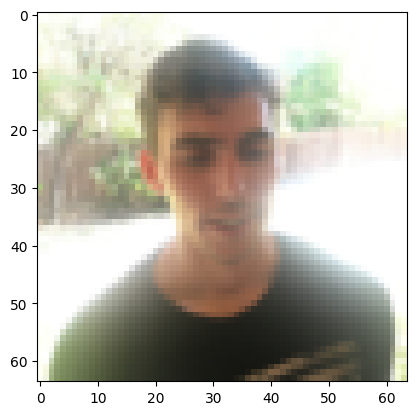

In [11]:
index = 121
plt.imshow(X_train_orig[index])
plt.show()

### 2 - Layers in TF Keras
In the previous assignment, you created layers manually in numpy. In TF.Keras, you don't have to write code directly to create layers. Rather, TF Keras has pre-defined layers you can use. 

When you create a layer in TF Keras, you are creating a function that takes some input and transforms it into an output you can reuse later. Nice and easy!



### 3 - The Sequential API
In the previous assignment, you built helper functions using numpy to understand the mechanics behind the convolutional neural networks. Most practical applications of deep learning today are built using programming frameworks, which have many built-in functions you can simply call. Keras is a high-level abstraction built on top of TensorFlow, which allows for even more simplified and optimized model creation and trainning. 

For the first part of this assignment, you will create a model using TF Keras' Sequential API, which allows you to build layer by layer, and is ideal for building models where each layer has exactly one input tensor and one output tensor. 

As you'll see, using the sequential API is simple and straightforward, but is only appropriate for simpler, more straightforward tasks. Later in this notebook, you'll spend some time building with a more flexible, powerful alternative: the Functional API.


### 3.1 - Create the Sequential Model

As mentioned earlier, The TensorFlow Keras Sequential API can be used to build simple models with layer operations that proceeded in a sequential order.

You can also add layers incrementally to a Sequential model using the `add()` method, or remove them using the `pop()` method, much like you would in a regular Python list.

Actually, you can think of a Sequential model as behaving like a Python list of layers! Like python lists, Sequential layers are ordered, and the order in which you add layers matters. if your model is non-linear or contains layers with multiple inputs or outputs, a Sequential model is not appropriate, and you should use the Functional API instead (which you'll do later in this assignment).

For any layer construction in TF Keras, you'll need to specify the input shape in advance. This is because in TF Keras, the shape of the weights is based on the shape of the input. the weight are only created when the model first see some input data. Sequential models can be created by passing a list of layers to the Sequential constructor. 



**Exercise 1-happyModel**

Implement the happyModel  function below to build the following model: ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE

Also, plug in the following parameters for all the steps:
- ZEROPAD2D padding = (3,3), input shape = (64,64,3)
- CONV2D: Use 32 filters, kernel size = (7,7), strides = (1,1), 'valid' padding
- BATCHNORM: for axis = 3
- RELU: no parameters
- MAXPOOL: default parameters
- FLATTEN: no parameters
- Fully-connected DENSE layer: Apply a fully connected layer with 1 neuron and a sigmoid activation function.

**Hint**

Use tfl to refer to tensorflow.keras.layers

In [12]:
## GRADE FUNCTION: HappyModel

def happyModel():
    """
    Implements the forward propagation for the binary classification model.
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL2D -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes.
    Normally, functions should take these values as function parameters.

    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process)
    
    """
    model = tf.keras.Sequential([
        # ZEROPAD2D with padding 3, input shape of (64, 64, 3)
        ## This layer can add rows and columns of at the top, bottom, left and right side of an image tensor. 
        tfl.layers.ZeroPadding2D(padding=3, input_shape=(64, 64, 3)),

        # Conv2D with 32 filters of shape 7x7, stride of 1
        tfl.layers.Conv2D(filters=32, kernel_size=(7,7), strides=(1,1), padding='valid'),

        # BatchNormalization on the channels axis
        ## Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
        ## axis, Integer, the axis that should be normalized (typically the features axis). For instance, after a Conv2D layer with data_format="channels_first", set axis=1 in BatchNormalization.
        tfl.layers.BatchNormalization(axis=3),


    ])

    return model



## BatchNormalization Axis 演示

让我们创建一个简单的示例来演示在不同axis上进行BatchNormalization的效果：

In [14]:
# 创建一个简单的数据示例来演示BatchNormalization在不同axis上的效果
import tensorflow as tf
import numpy as np

# 设置随机种子以获得可重复的结果
tf.random.set_seed(42)
np.random.seed(42)

# 创建一个小的4D张量，模拟Conv2D的输出
# 形状: (batch_size=2, height=3, width=3, channels=2)
sample_data = np.array([
    [[[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]],
     [[7.0, 8.0], [9.0, 10.0], [11.0, 12.0]], 
     [[13.0, 14.0], [15.0, 16.0], [17.0, 18.0]]],
    
    [[[19.0, 20.0], [21.0, 22.0], [23.0, 24.0]],
     [[25.0, 26.0], [27.0, 28.0], [29.0, 30.0]],
     [[31.0, 32.0], [33.0, 34.0], [35.0, 36.0]]]
], dtype=np.float32)

print("原始数据形状:", sample_data.shape)
## param 0 表示第一个样本
## param 1 表示高度维度
## param 2 表示宽度维度
## param 3 表示通道维度
print("原始数据:")
print("Batch 0:")
print("Channel 0:\n", sample_data[0, :, :, 0])
print("Channel 1:\n", sample_data[0, :, :, 1])
print("\nBatch 1:")
print("Channel 0:\n", sample_data[1, :, :, 0])
print("Channel 1:\n", sample_data[1, :, :, 1])

原始数据形状: (2, 3, 3, 2)
原始数据:
Batch 0:
Channel 0:
 [[ 1.  3.  5.]
 [ 7.  9. 11.]
 [13. 15. 17.]]
Channel 1:
 [[ 2.  4.  6.]
 [ 8. 10. 12.]
 [14. 16. 18.]]

Batch 1:
Channel 0:
 [[19. 21. 23.]
 [25. 27. 29.]
 [31. 33. 35.]]
Channel 1:
 [[20. 22. 24.]
 [26. 28. 30.]
 [32. 34. 36.]]


In [29]:
sample_data.shape 

(2, 3, 3, 2)

In [30]:
print(np.mean(sample_data[:,0,:,:]))

print(np.mean(sample_data[:,1,:,:]))

print(np.mean(sample_data[:,2,:,:]))

print('全局均值')
print(np.mean(sample_data, axis=(0,2,3)))

12.5
18.5
24.5
全局均值
[12.5 18.5 24.5]


In [25]:
np.mean([3.5, 9.5,15.5])

np.float64(9.5)

In [17]:
# 测试不同axis值的BatchNormalization效果

def test_batchnorm_axis(data, axis):
    """测试BatchNormalization在指定axis上的效果"""
    # 创建BatchNormalization层
    bn_layer = tf.keras.layers.BatchNormalization(axis=axis)
    
    # 应用BatchNormalization
    normalized_data = bn_layer(data, training=True)
    
    return normalized_data.numpy()

# 转换为tensorflow张量
input_tensor = tf.constant(sample_data)
## 张量维度
print("张量维度:", input_tensor.shape)

print("="*60)
print("1. 正确用法: axis=3 (channels维度)")
print("="*60)
result_axis3 = test_batchnorm_axis(input_tensor, axis=3)
print("归一化后的数据 (axis=3):")
print("Batch 0, Channel 0:\n", result_axis3[0, :, :, 0])
print("Batch 0, Channel 1:\n", result_axis3[0, :, :, 1])

print("\n" + "="*60)
print("2. 错误用法: axis=1 (height维度)") 
print("="*60)
result_axis1 = test_batchnorm_axis(input_tensor, axis=1)
print("归一化后的数据 (axis=1):")
print("Batch 0, Channel 0:\n", result_axis1[0, :, :, 0])
print("Batch 0, Channel 1:\n", result_axis1[0, :, :, 1])

print("\n" + "="*60)
print("3. 错误用法: axis=2 (width维度)")
print("="*60)
result_axis2 = test_batchnorm_axis(input_tensor, axis=2)
print("归一化后的数据 (axis=2):")
print("Batch 0, Channel 0:\n", result_axis2[0, :, :, 0])
print("Batch 0, Channel 1:\n", result_axis2[0, :, :, 1])

张量维度: (2, 3, 3, 2)
1. 正确用法: axis=3 (channels维度)
归一化后的数据 (axis=3):
Batch 0, Channel 0:
 [[-1.6383485  -1.4456016  -1.2528547 ]
 [-1.0601078  -0.86736095 -0.6746141 ]
 [-0.4818672  -0.28912032 -0.09637344]]
Batch 0, Channel 1:
 [[-1.6383485  -1.4456016  -1.2528547 ]
 [-1.0601078  -0.86736095 -0.6746141 ]
 [-0.4818672  -0.28912032 -0.09637344]]

2. 错误用法: axis=1 (height维度)
归一化后的数据 (axis=1):
Batch 0, Channel 0:
 [[-1.2553682  -1.0370433  -0.8187184 ]
 [-1.2553682  -1.0370433  -0.81871843]
 [-1.2553682  -1.0370433  -0.81871843]]
Batch 0, Channel 1:
 [[-1.1462058 -0.9278809 -0.7095559]
 [-1.1462059 -0.9278809 -0.709556 ]
 [-1.1462058 -0.9278809 -0.709556 ]]

3. 错误用法: axis=2 (width维度)
归一化后的数据 (axis=2):
Batch 0, Channel 0:
 [[-1.5108404  -1.5108404  -1.5108404 ]
 [-0.925999   -0.925999   -0.9259989 ]
 [-0.34115756 -0.34115756 -0.34115744]]
Batch 0, Channel 1:
 [[-1.4133669  -1.4133668  -1.4133668 ]
 [-0.8285254  -0.8285254  -0.8285253 ]
 [-0.24368393 -0.24368393 -0.24368393]]


In [33]:
# 详细分析每种axis设置的含义
print("\n" + "="*70)
print("详细分析:")
print("="*70)

print("\n1. axis=3 (channels): 正确的用法")
print("   - 在channels维度上进行归一化")
## 指定channels维度, 然后计算所有batch、height、width位置的均值和方差
print("   - 对于每个channel，计算所有batch、height、width位置的均值和方差")
print("   - 保持了空间特征的相对关系")

print("\n2. axis=1 (height): 错误的用法")
print("   - 在height维度上进行归一化") 
## 指定height, 然后计算所有batch、height、width位置的均值和方差

print("   - 对于每个height位置，计算所有batch、width、channels的均值和方差")
print("   - 破坏了垂直方向的空间特征关系")

print("\n3. axis=2 (width): 错误的用法")
print("   - 在width维度上进行归一化")
print("   - 对于每个width位置，计算所有batch、height、channels的均值和方差") 
print("   - 破坏了水平方向的空间特征关系")

# 计算统计信息来验证
print("\n" + "="*70)
print("统计信息验证:")
print("="*70)

# 原始数据统计
print("原始数据各维度的均值:")
print(f"  全局均值: {np.mean(sample_data):.2f}")
print(f"  按channels(axis=3): {np.mean(np.mean(sample_data, axis=(0,1,2)))}")
print(f"  按height(axis=1): {np.mean(np.mean(sample_data, axis=(0,2,3)))}")  
print(f"  按width(axis=2): {np.mean(np.mean(sample_data, axis=(0,1,3)))}")

print("\nBatchNorm后各维度的均值:")
print(f"  axis=3结果的channels均值: {np.mean(np.mean(result_axis3, axis=(0,1,2)))}")
print(f"  axis=1结果的height均值: {np.mean(np.mean(result_axis1, axis=(0,2,3)))}")
print(f"  axis=2结果的width均值: {np.mean(np.mean(result_axis2, axis=(0,1,3)))}")


详细分析:

1. axis=3 (channels): 正确的用法
   - 在channels维度上进行归一化
   - 对于每个channel，计算所有batch、height、width位置的均值和方差
   - 保持了空间特征的相对关系

2. axis=1 (height): 错误的用法
   - 在height维度上进行归一化
   - 对于每个height位置，计算所有batch、width、channels的均值和方差
   - 破坏了垂直方向的空间特征关系

3. axis=2 (width): 错误的用法
   - 在width维度上进行归一化
   - 对于每个width位置，计算所有batch、height、channels的均值和方差
   - 破坏了水平方向的空间特征关系

统计信息验证:
原始数据各维度的均值:
  全局均值: 18.50
  按channels(axis=3): 18.5
  按height(axis=1): 18.5
  按width(axis=2): 18.5

BatchNorm后各维度的均值:
  axis=3结果的channels均值: 6.622738357719982e-09
  axis=1结果的height均值: -2.6490953430879927e-08
  axis=2结果的width均值: -6.622739245898401e-09


### 深入分析：为什么归一化前均值相同，但归一化后均值不同？

**关键原因：方差（variance）的差异**

BatchNormalization的公式：
$$\hat{x} = \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}} \times \gamma + \beta$$

其中：
- $\mu$ 是均值
- $\sigma^2$ 是方差
- $\gamma, \beta$ 是可学习参数（初始时 $\gamma=1, \beta=0$）

即使原始数据在某个维度上的均值相同，但如果**方差不同**，经过 $\frac{1}{\sqrt{\sigma^2}}$ 缩放后，数据的分布就会不同，从而导致在其他维度上计算的均值也不同。

In [ ]:
# 验证方差的影响
print("="*70)
print("验证：方差如何影响BatchNorm结果")
print("="*70)

# 计算原始数据在不同维度上的方差
print("\n原始数据的方差分析:")
print(f"  全局方差: {np.var(sample_data):.2f}")

# axis=3 (channels): 对每个channel，计算跨batch、height、width的方差
channel_0_data = sample_data[:, :, :, 0]  # 所有batch、height、width上的channel 0
channel_1_data = sample_data[:, :, :, 1]  # 所有batch、height、width上的channel 1
print(f"\n按channels(axis=3)的方差:")
print(f"  Channel 0的方差: {np.var(channel_0_data):.2f}")
print(f"  Channel 1的方差: {np.var(channel_1_data):.2f}")

# axis=1 (height): 对每个height位置，计算跨batch、width、channels的方差
height_0_data = sample_data[:, 0, :, :]
height_1_data = sample_data[:, 1, :, :]
height_2_data = sample_data[:, 2, :, :]
print(f"\n按height(axis=1)的方差:")
print(f"  Height 0的方差: {np.var(height_0_data):.2f}")
print(f"  Height 1的方差: {np.var(height_1_data):.2f}")
print(f"  Height 2的方差: {np.var(height_2_data):.2f}")

# axis=2 (width): 对每个width位置，计算跨batch、height、channels的方差
width_0_data = sample_data[:, :, 0, :]
width_1_data = sample_data[:, :, 1, :]
width_2_data = sample_data[:, :, 2, :]
print(f"\n按width(axis=2)的方差:")
print(f"  Width 0的方差: {np.var(width_0_data):.2f}")
print(f"  Width 1的方差: {np.var(width_1_data):.2f}")
print(f"  Width 2的方差: {np.var(width_2_data):.2f}")

In [ ]:
# 手动演示BatchNorm的计算过程（以axis=3为例）
print("\n" + "="*70)
print("手动演示BatchNorm计算过程 (axis=3):")
print("="*70)

# 对channel 0进行手动BatchNorm
channel_0_mean = np.mean(channel_0_data)
channel_0_var = np.var(channel_0_data)
channel_0_std = np.sqrt(channel_0_var + 1e-3)  # epsilon=1e-3

print(f"\nChannel 0:")
print(f"  均值: {channel_0_mean:.2f}")
print(f"  方差: {channel_0_var:.2f}")
print(f"  标准差: {channel_0_std:.2f}")

# 归一化公式: (x - mean) / std
channel_0_normalized = (channel_0_data - channel_0_mean) / channel_0_std
print(f"  归一化后均值: {np.mean(channel_0_normalized):.6f} (应该接近0)")
print(f"  归一化后方差: {np.var(channel_0_normalized):.6f} (应该接近1)")

# 对channel 1进行手动BatchNorm
channel_1_mean = np.mean(channel_1_data)
channel_1_var = np.var(channel_1_data)
channel_1_std = np.sqrt(channel_1_var + 1e-3)

print(f"\nChannel 1:")
print(f"  均值: {channel_1_mean:.2f}")
print(f"  方差: {channel_1_var:.2f}")
print(f"  标准差: {channel_1_std:.2f}")

channel_1_normalized = (channel_1_data - channel_1_mean) / channel_1_std
print(f"  归一化后均值: {np.mean(channel_1_normalized):.6f} (应该接近0)")
print(f"  归一化后方差: {np.var(channel_1_normalized):.6f} (应该接近1)")

In [ ]:
# 关键演示：为什么归一化后在其他维度上计算的均值会不同
print("\n" + "="*70)
print("关键发现：方差差异如何影响归一化后的分布")
print("="*70)

print("\n假设我们在height维度(axis=1)上计算归一化后数据的均值：")
print("虽然每个channel在其自己的维度上被归一化到均值≈0、方差≈1，")
print("但是在height维度上重新计算均值时，结果会不同。\n")

# 重新组织归一化后的数据
normalized_data_manual = np.zeros_like(sample_data)
normalized_data_manual[:, :, :, 0] = channel_0_normalized
normalized_data_manual[:, :, :, 1] = channel_1_normalized

# 在height维度上计算均值
print("归一化后，在height维度上的均值：")
for h in range(3):
    height_mean = np.mean(normalized_data_manual[:, h, :, :])
    print(f"  Height {h}: {height_mean:.4f}")

print("\n为什么这些均值不同？")
print("因为：")
print("1. 每个channel用自己的均值和方差进行归一化")
print("2. 两个channel的原始方差不同 (Channel 0: {:.2f}, Channel 1: {:.2f})".format(
    channel_0_var, channel_1_var))
print("3. 归一化时除以不同的标准差，导致缩放程度不同")
print("4. 在height维度重新组合时，不同的缩放导致了不同的均值")

print("\n" + "="*70)
print("结论：")
print("="*70)
print("✓ 归一化前，不同维度的均值可能相同")
print("✓ 但如果方差不同，归一化会用不同的标准差进行缩放")
print("✓ 这导致归一化后在其他维度上的统计特性发生变化")
print("✓ 因此，方差的差异是导致归一化后均值不同的主要原因！")

### 结论

**正确用法 (axis=3)**:
- 在channels维度进行归一化是标准做法
- 保持了每个feature map的空间结构
- 每个channel独立进行归一化，学习到channel特定的统计特性

**错误用法的后果**:
1. **axis=1 (height)**: 会使不同高度位置的特征被强制归一化到相同分布，破坏了垂直方向的梯度信息
2. **axis=2 (width)**: 会使不同宽度位置的特征被强制归一化到相同分布，破坏了水平方向的梯度信息

这种错误设置会导致：
- 模型无法正确学习空间特征
- 训练不稳定
- 性能下降
- 特征表示能力减弱